This is an interactive agent. All it does is to return "That sounds interesting. Please tell me more" when it hears non-aggressive sentences. Otherwise, it will simply rely "I'm sorry about that. Can you tell me another story?".

An aggressive reply is naively defined as one that contains aggresive words. Otherwise, it is not. 

So we will first need to design a list of words that to identify aggresive sentences.

In [11]:
class sentence_checker:    
    splitted_inp = []
    
    def __init__(self, check_words=[]):
        self.check_words = check_words
    
    def check_sentence(self):
        count = 0;
        for word in self.check_words:
            if word in self.splitted_inp:
                count += 1
        return count > 0

sentence_checker.splitted_inp = input("Enter a sentence: ").split()

agg_check = sentence_checker(['fuck', 'fucking', 'shit', 'retard', 'loser'])
pol_check = sentence_checker(['please', 'would', 'beautiful', 'excellent'])
end_check = sentence_checker(['bye', 'end', 'see you', 'farewell', 'leaving'])

if end_check.check_sentence() == True:
    print("Glad talking to you. Bye")
else:
    if agg_check.check_sentence() == True:
        print("I'm sorry about that. Can you tell me another story?")
    else:
        if pol_check.check_sentence() == True:
            print("That's very nice of you. I'd like to know more!")
        else:
            print("That sounds interesting. Please tell me more")

Enter a sentence: Hi fuck
I'm sorry about that. Can you tell me another story?


Ex1: Now you need to test if an input sentense is aggrestive or not. 

Ex2: Now that you can do it for one round of interaction. You can then define a few words for the termination of the converstaion. For example, if you see the word 'bye' then you just reply 'Glad talking to you. Bye'. 

Ex3: Finally. I encourage you to write an object oriented version of this code. That is, write a class 

Ex4: Write some sentences and their corresponding 'rude/not rude' label. Report the accuracy. 

Ex5: What about polite words? Define a list of polite words and classify such sentences and reply in a nicer way. E.g. "That's very nice of you. I'd like to know more!". Now your agent should have 3 different kinds of replies.

Results & analysis before training:  ([0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, -1, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 1, 1, 1, 0, 0, 1, -1], 3)


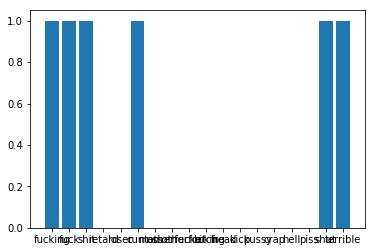

Top 5 most useful words:  ['fucking', 'fuck', 'shit', 'retard', 'loser']


'\ntest = Human("Testing_data")\ntest.load_conversation(\'test_data_Tico.csv\')\ntest_a = Agent("Testing_agent")\nprint(test_a.testing(test))'

In [17]:
import matplotlib.pyplot as plt

aggressive = -1
neutral = 0
polite = 1

aggressive_words = ['fucking', 'fuck', 'shit', 'retard', 'loser', 'cunt', 'ass', 'motherfucker', 'motherfucking', 'bitch', 'freak', 'dick', 'pussy', 'crap', 'hell', 'piss', 'shut', 'terrible']
polite_words = ['please', 'would', 'beautiful', 'excellent', 'perhaps', 'delightful', 'excuse', 'thanks', 'pardon', 'beg', 'sorry', 'like', 'could', 'should', 'prefer', 'nice', 'love']

class Sentence_checker:
    check_words = []
    
    def __init__(self, word_list):
        self.check_words = word_list
        
    def check_sentence(self, input_sentence):
        splitted_inp = input_sentence.split(' ')
        for word in splitted_inp:
            if word in self.check_words:
                return True
        return False

class Individual:

    name = ''
    conversation = []
    
    def __init__(self, name):
        self.name = name

    def print_name(self):
        print(self.name)

class Agent(Individual):
    
    aggressive_checker = Sentence_checker(aggressive_words)
    polite_checker = Sentence_checker(polite_words)
    importance_rank = {}
    top_importance_rank = []
    
    def __init__(self, name):
        super().__init__(name)
        
    def check_human_sentence(self, input_sentence):
        if (self.aggressive_checker.check_sentence(input_sentence)):
            return -1
        elif (self.polite_checker.check_sentence(input_sentence)):
            return 1
        else:
            return 0
        
    def interact_with_human(self, human):       
        results = []
        training_conversation_history = human.training_sentences
        for sen in training_conversation_history:
            results.append(self.check_human_sentence(sen))
        analysis = sum(results)
        return results, analysis
    
    def training (self, human):
        global aggressive_words
        for check_word in self.aggressive_checker.check_words:
            self.importance_rank[check_word] = 0
            amount = 0
            for inp_sen in human.training_sentences:
                inp_words = inp_sen.split(' ')
                for inp_word in inp_words:
                    if check_word == inp_word:
                        amount += 1
            self.importance_rank[check_word] = amount
        sorted(self.importance_rank.values(), reverse = True)
        plt.bar(range(len(self.importance_rank)), list(self.importance_rank.values()))
        plt.xticks(range(len(self.importance_rank)), list(self.importance_rank.keys()))
        plt.show()
        self.top_importance_rank = list(self.importance_rank.keys())[:5]
        aggressive_words = self.top_importance_rank
        
    def testing (self, human):
        results = []
        testing_conversation_history = human.training_sentences
        for sen in testing_conversation_history:
            results.append(self.check_human_sentence(sen))
        analysis = sum(results)
        return results, analysis
            

class Human(Individual):
    
    training_sentences = []
    label = []
    
    def __init__(self, name):
        super().__init__(name)
        
    def load_conversation(self, csv_file_path):
        import csv
        with open(csv_file_path) as csv_data:
            csvReader = csv.reader(csv_data)
            next(csvReader)
            for row in csvReader:
                self.training_sentences.append(row[0])
                self.label.append(row[1])
        
train = Human("Training_data")                 #TEST
#print(aggressive_words)
train.load_conversation('training_data_stein.csv')
train_a = Agent("Training_agent")
print('Results & analysis before training: ', train_a.interact_with_human(train))
train_a.training (train)
print('Top 5 most useful words: ', train_a.top_importance_rank)
#print(aggressive_words)

'''
test = Human("Testing_data")
test.load_conversation('test_data_Tico.csv')
test_a = Agent("Testing_agent")
print(test_a.testing(test))''' #Isn't this the same as interact_with_human?
#Sort function doesn't work as preffered.

Ex6: both the agent and the human in this conversation are individuals. Can you define a class for human also and make it a subclass of individual (same for the agent case). Please store the name of the user and says good bye to him as the end of the conversation. E.g. "Good bye Finn".